## 1.内容介绍

- 载入库
- 载入数据
- 数据总览
- 判断数据缺失和异常
- 了解预测值的分布
- 特征分为类别特征和数字特征，并对类别特征查看unique分布
- 数字特征分布
    - 相关性分布
    - 查看几个特征值：偏度和峰度
    - 查看预测值的具体频数
- 数字特征分析
    - 相关性分析
    - 类别特征箱形图可视化
    - 类别特征的小提琴图可视化
    - 类别特征的柱形图可视化类别
    - 特征的每个类别频数可视化(count_plot)
- 用pandas_profiling生成数据报告

## 2.代码示例

### 1）载入各种数据科学以及可视化库

In [1]:
#导入warning包，利用过滤器来实现忽略警告语句
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 2)载入数据

In [2]:
## 1）载入训练集和测试集
Train_data=pd.read_csv('./used_car_train_20200313.csv',sep=' ')
Test_data=pd.read_csv('./used_car_testB_20200421.csv',sep=' ')

- 数据含义
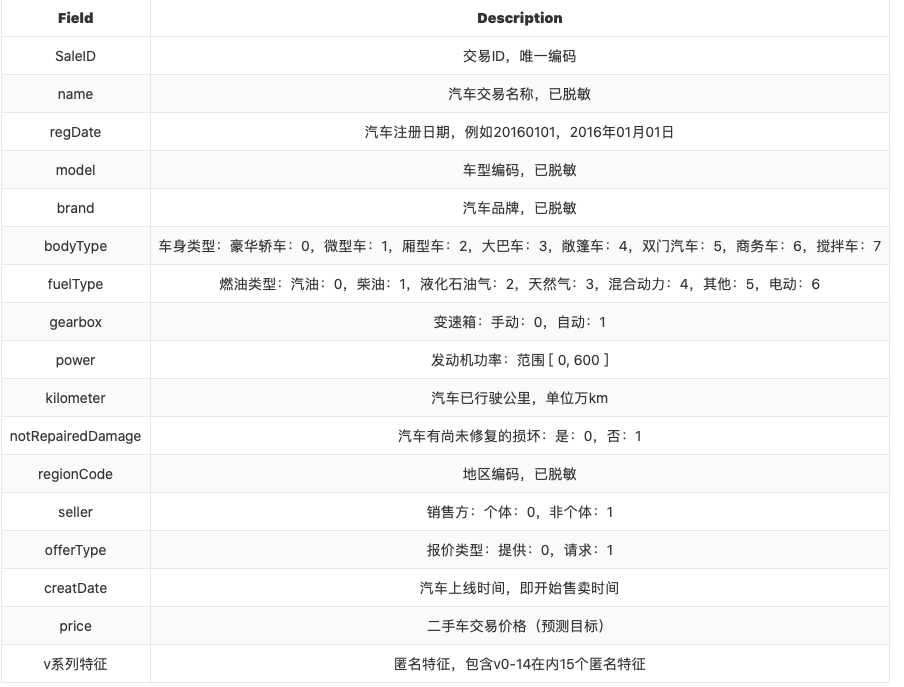

In [3]:
## 2）简略观察数据（head()+shape）
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
Train_data.shape

(150000, 31)

In [5]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [6]:
Test_data.shape

(50000, 30)

### 3)数据概况

In [7]:
## describe()来熟悉数据的相关统计量
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [9]:
## info()来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [10]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

### 4)判断数据缺失和异常

In [11]:
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [12]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

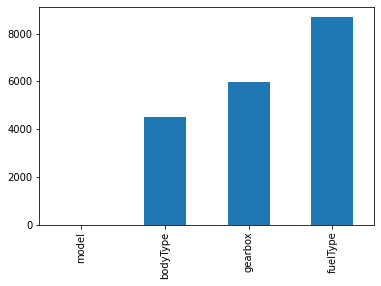

In [13]:
## nan可视化
missing=Train_data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

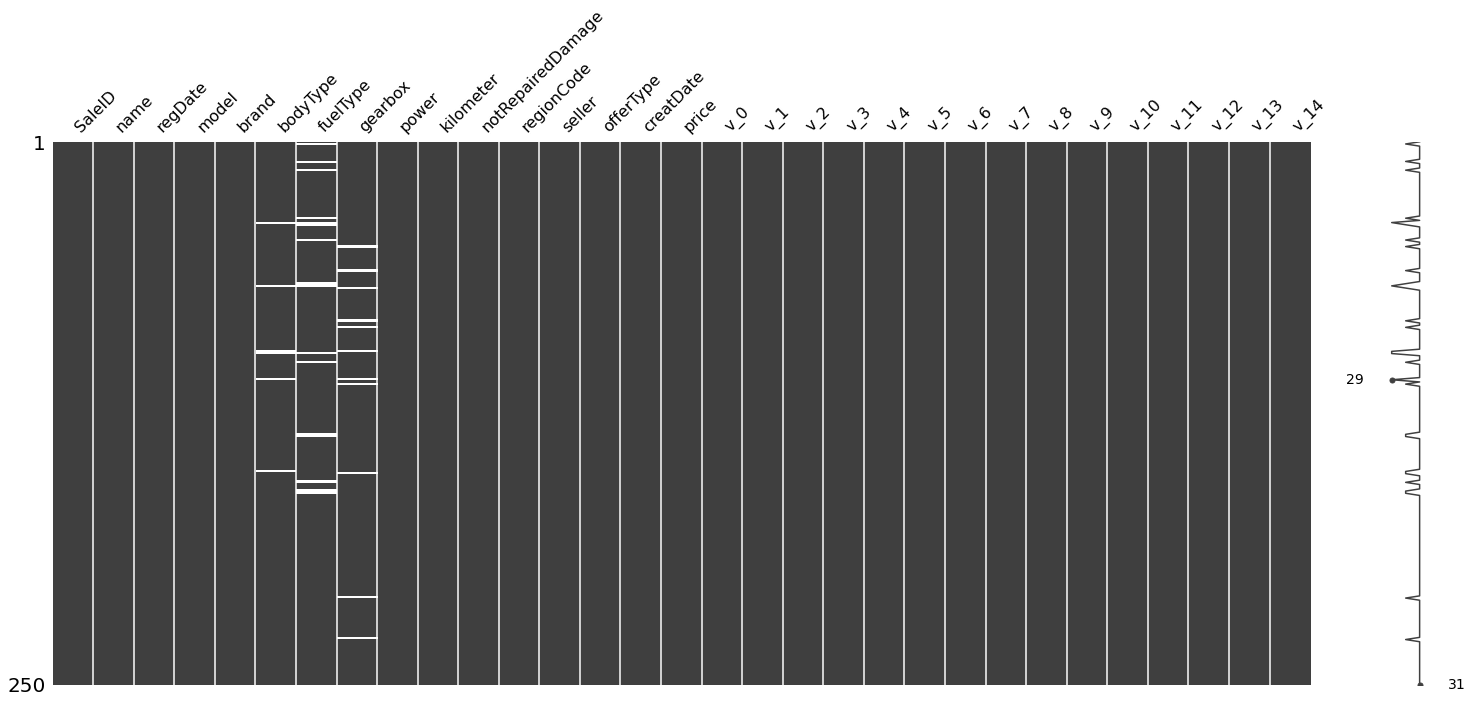

In [14]:
#nan个数少可以选择填充
#nan个数大需要删掉

#可视化看下缺省值
msno.matrix(Train_data.sample(250))
#白线越多代表缺失值越多

<AxesSubplot:>

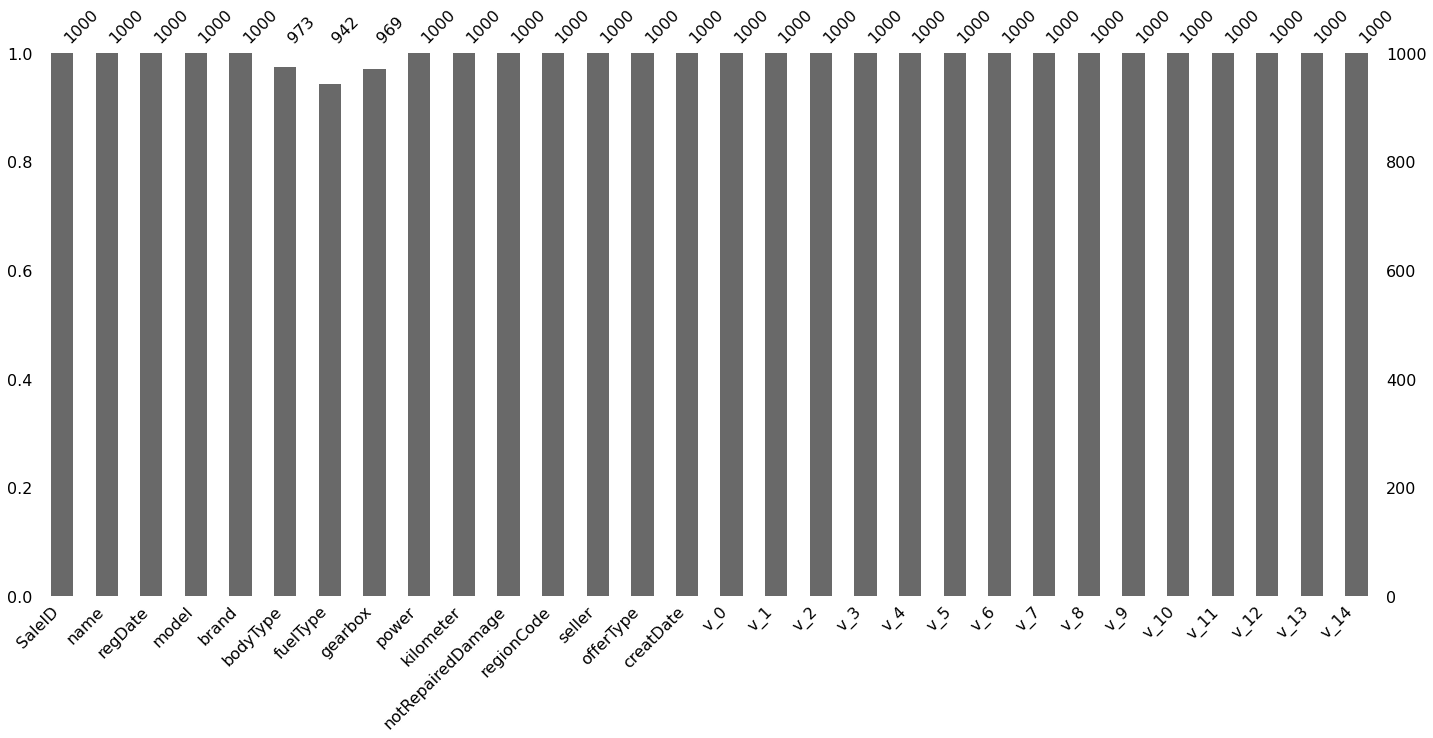

In [15]:
msno.bar(Test_data.sample(1000))

In [16]:
#notRepairedDamage为object类型，需要对值进行显示才能知道缺失情况
Train_data['notRepairedDamage'].value_counts()
#其中-为缺失值

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [17]:
#先将-替换成nan
Train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [18]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [19]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [20]:
Test_data['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [21]:
Test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [23]:
## 以下两个类别特征严重倾斜，因此选择删掉特征
Train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [24]:
Train_data['offerType'].value_counts()
#对回归结果无影响，所以剔除

0    150000
Name: offerType, dtype: int64

In [25]:
del Train_data['seller']
del Train_data['offerType']
del Test_data['seller']
del Test_data['offerType']

### 5)了解预测值的分布

In [26]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [27]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

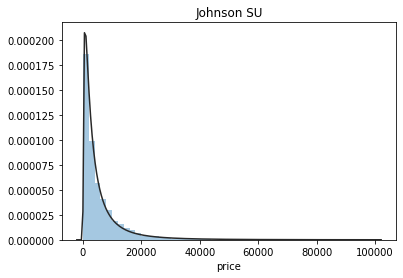

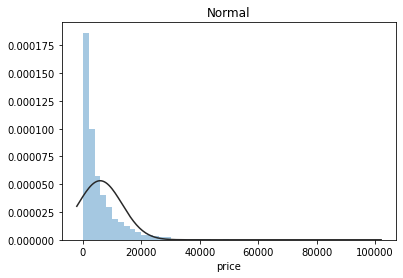

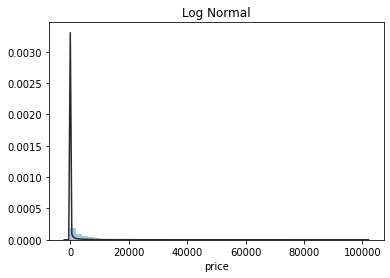

In [29]:
#1）总体分布概况
import scipy.stats as st
y=Train_data['price']
plt.figure(1);plt.title('Johnson SU')#无界的约翰逊分布
sns.distplot(y,kde=False,fit=st.johnsonsu)#不显示核密度
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)#标准正态分布
plt.figure(3);plt.title('Log Normal')
sns.distplot(y,kde=False,fit=st.lognorm)
#直方图和条形图的区别，条形图有空隙，直方图没有，条形图一般用于类别特征，直方图一班用于数字特征（连续型）
#fit:控制拟合的参数分布图形

- 价格不服从正态分布，所以在进行回归之前，必须进行转换。从图中可以看出拟合的最佳结果是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


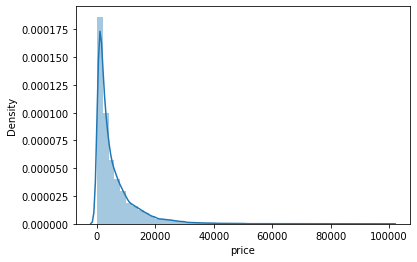

In [30]:
## 2）查看skewness and kurtosis偏度和峰度
sns.distplot(Train_data['price']);
print('Skewness: %f' % Train_data['price'].skew())
print('Kurtosis: %f' % Train_data['price'].kurt())

- 偏度和峰度介绍
- 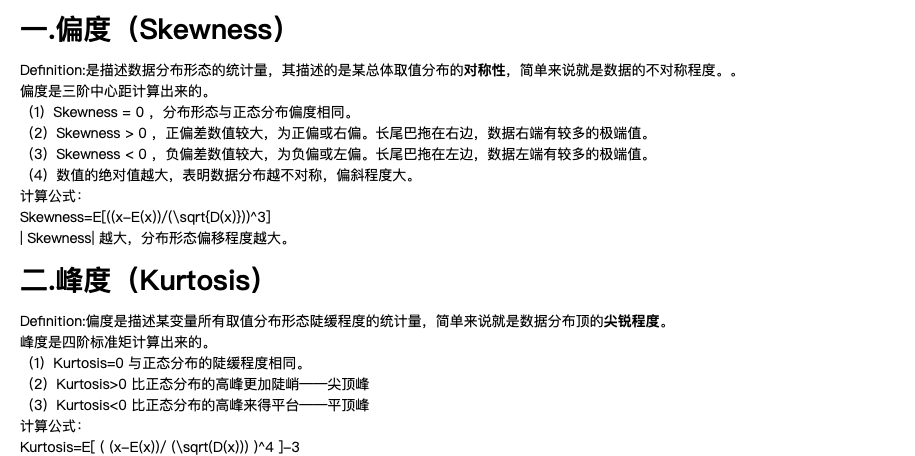

In [31]:
Train_data.skew(),Train_data.kurt()
#可以看出power这个特征存在问题，偏度和峰度和其他特征相差太大

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

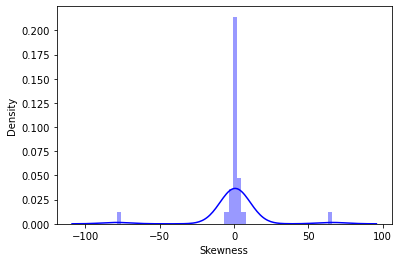

In [32]:
sns.distplot(Train_data.skew(),color='blue',axlabel='Skewness')

<AxesSubplot:xlabel='Kurtness', ylabel='Density'>

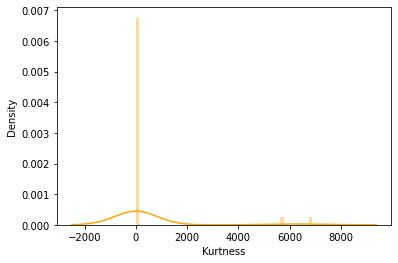

In [33]:
sns.distplot(Train_data.kurt(),color='orange',axlabel='Kurtness')

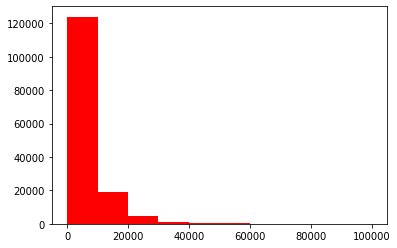

In [35]:
## 3）查看预测值的具体频数
plt.hist(Train_data['price'],orientation='vertical',histtype='bar',color='red')
plt.show()
#orientation直方图方向，竖直还是水平

- 查看频数，大于20000的值极少，其实这里也可以把这些当作特殊的值（异常值）直接用填充或者删掉，再进行前面的分布绘图

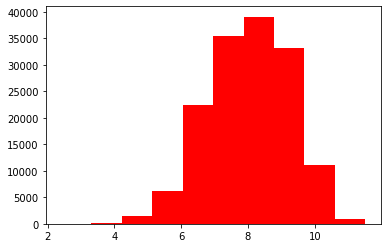

In [36]:
#log变换之后的分布较均匀，可以进行log变换进行预测
plt.hist(np.log(Train_data['price']),orientation='vertical',histtype='bar',color='red')
plt.show()

### 6)特征分为类别特征和数字特征，并对类别特征查看unique分布

In [37]:
# 分离label即预测值
Y_train=Train_data['price']


In [38]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features=Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# #类别特征
# categorical_features=Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [39]:
numeric_features=['power','kilometer','v_0','v_1','v_2','v_3','v_4','v_5','v_6','v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']

categorical_features=['name','model','brand','bodyType','fuelType','gearbox','notRepairedDamage','regionCode']


In [41]:
#特征unique分布
for cat_fea in categorical_features:
    print(cat_fea+'的特征分布如下：')
    print('{}特征有{}不同的值'.format(cat_fea,Train_data[cat_fea].nunique()))
    #nunique（）表示有几个不同的值,有几行
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
bodyTyp

In [45]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea+'的特征分布如下：')
    print('{}特征有{}不同的值'.format(cat_fea,Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有37536不同的值
387       94
55        93
1541      86
708       85
203       78
          ..
97691      1
155039     1
44449      1
112034     1
105129     1
Name: name, Length: 37536, dtype: int64
model的特征分布如下：
model特征有245不同的值
0.0      3772
19.0     3226
4.0      2790
1.0      1981
29.0     1778
         ... 
229.0       2
209.0       2
242.0       1
241.0       1
244.0       1
Name: model, Length: 245, dtype: int64
brand的特征分布如下：
brand特征有40不同的值
0     10473
4      5532
14     5345
10     4713
1      4627
6      3500
9      2360
5      1485
13     1386
11      942
3       820
16      770
25      728
7       727
8       708
27      623
21      543
15      476
19      473
20      411
12      399
22      358
26      328
30      321
17      312
24      248
28      216
32      183
29      139
37      117
2       115
31      113
18      107
33       84
35       75
34       75
36       72
23       60
38       31
39        5
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有8

### 7)数字特征分布

In [46]:
numeric_features.append('price')

In [47]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [48]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [49]:
## 1）相关性分析
price_numeric=Train_data[numeric_features]
correlation=price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

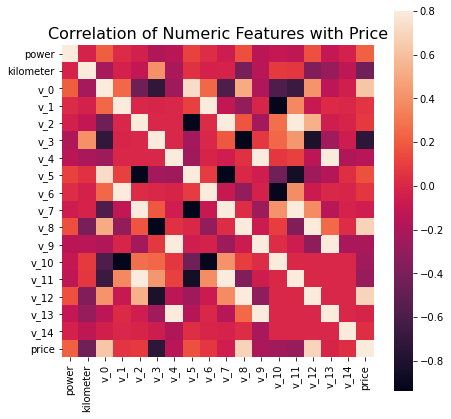

In [53]:
f,ax=plt.subplots(figsize=(7,7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [56]:
del price_numeric['price']

In [58]:
## 2）查看几个特征的偏度和峰度
for col in numeric_features:
    print('{:15}'.format(col),
         'Skewness:{:05.2f}'.format(Train_data[col].skew()),
         'Kurtosis:{:06.2f}'.format(Train_data[col].kurt()))

power           Skewness:65.86 Kurtosis:5733.45
kilometer       Skewness:-1.53 Kurtosis:001.14
v_0             Skewness:-1.32 Kurtosis:003.99
v_1             Skewness:00.36 Kurtosis:-01.75
v_2             Skewness:04.84 Kurtosis:023.86
v_3             Skewness:00.11 Kurtosis:-00.42
v_4             Skewness:00.37 Kurtosis:-00.20
v_5             Skewness:-4.74 Kurtosis:022.93
v_6             Skewness:00.37 Kurtosis:-01.74
v_7             Skewness:05.13 Kurtosis:025.85
v_8             Skewness:00.20 Kurtosis:-00.64
v_9             Skewness:00.42 Kurtosis:-00.32
v_10            Skewness:00.03 Kurtosis:-00.58
v_11            Skewness:03.03 Kurtosis:012.57
v_12            Skewness:00.37 Kurtosis:000.27
v_13            Skewness:00.27 Kurtosis:-00.44
v_14            Skewness:-1.19 Kurtosis:002.39
price           Skewness:03.35 Kurtosis:019.00


In [59]:
## 3）每个数字特征的分布可视化
f=pd.melt(Train_data,value_vars=numeric_features)#value_vars需要被转化的列
#f的每列都是一个变量，每一行都是一个观察点

,variable,value
0,power,60.0
1,power,0.0
2,power,163.0
3,power,193.0
4,power,68.0
...,...,...
2699995,price,5900.0
2699996,price,9500.0
2699997,price,7500.0
2699998,price,4999.0


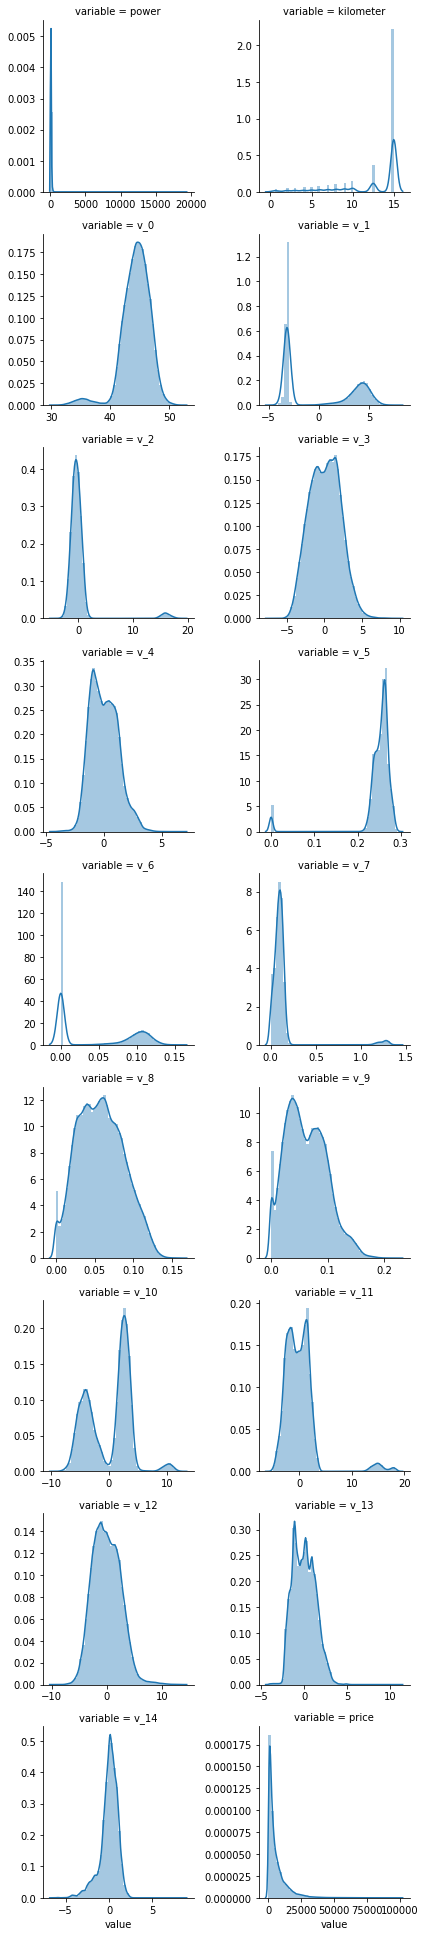

In [60]:
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
#只能画两列，不共享x轴和y轴
g=g.map(sns.distplot,'value')

- 可以看出匿名特征相对分布均匀

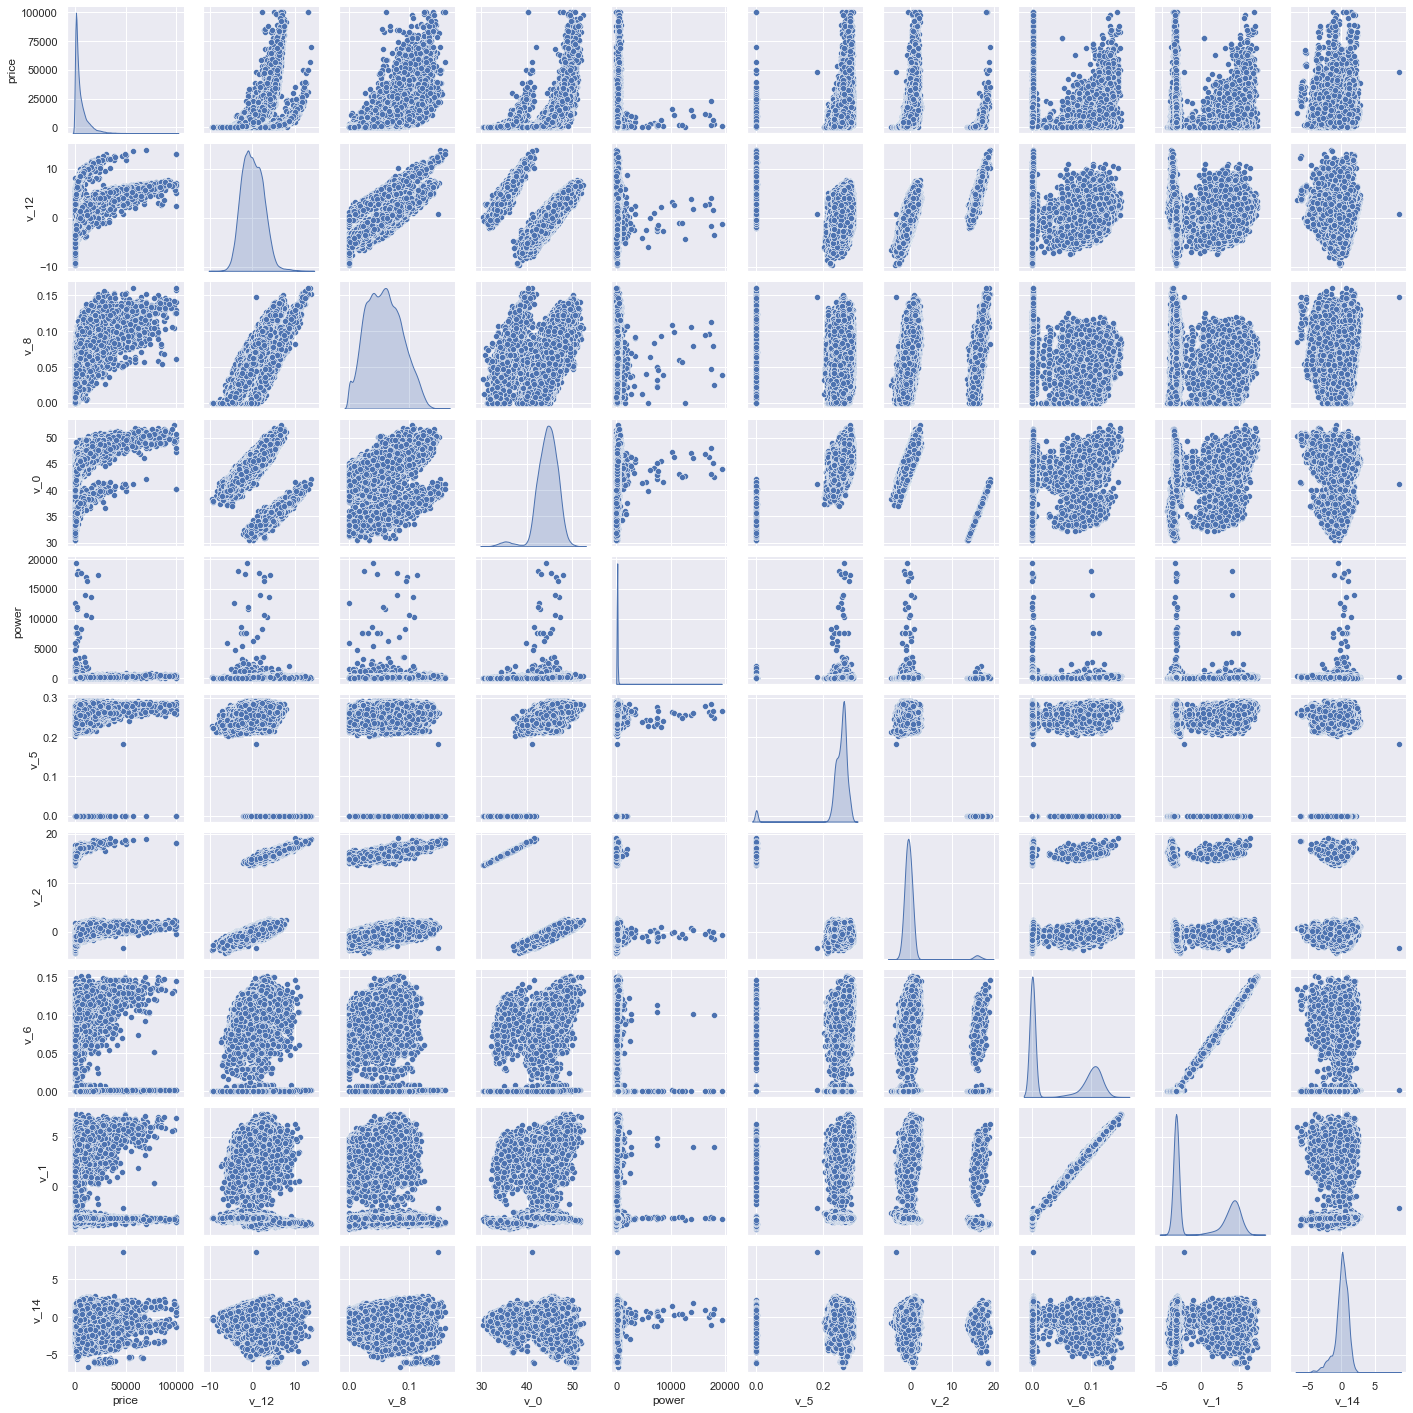

In [63]:
## 4）数字特征相互之间的关系可视化
sns.set()#设置画图空间为seaborn默认风格
columns=['price','v_12','v_8','v_0','power','v_5','v_2','v_6','v_1','v_14']
sns.pairplot(Train_data[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()
#pairplot展现变量两两之间的关系，线性，非线性，相关等等
#kind:用于控制非对角线上图的类型，可选scatter和reg
#diag_kind：用于控制对角线上的图像类型，可选hist与kde


In [64]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [65]:
Y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

- 多变量的可视化可参考https://www.jianshu.com/p/6e18d21a4cad

<AxesSubplot:xlabel='v_13', ylabel='price'>

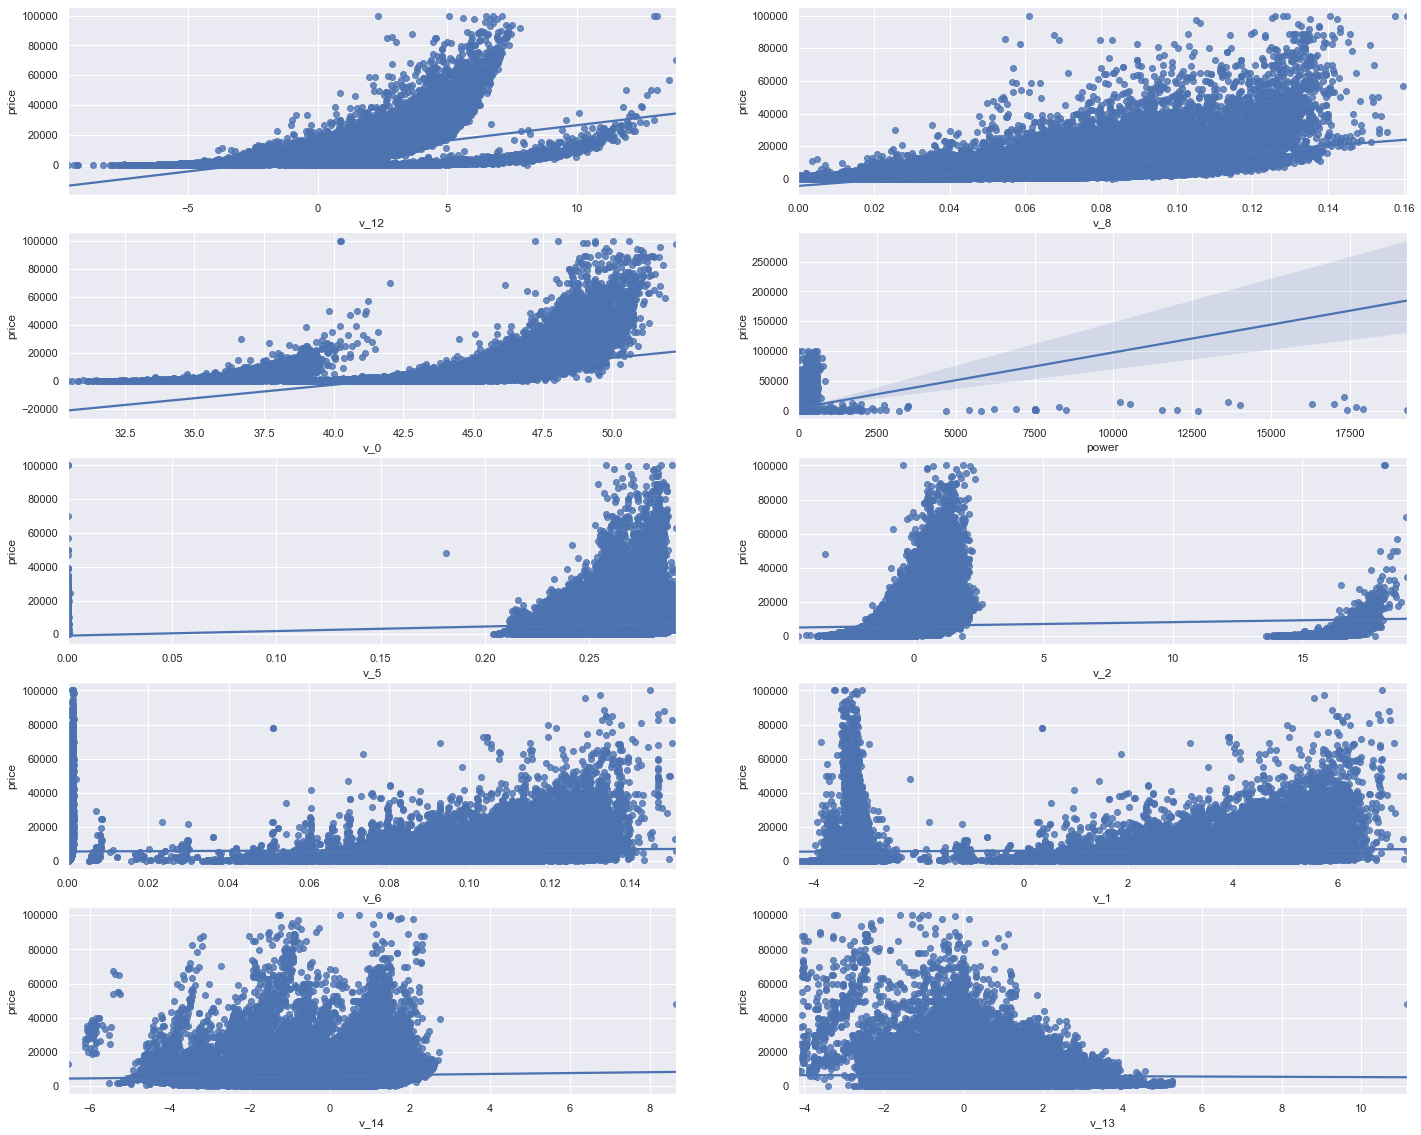

In [67]:
## 5）多变量互相回归关系可视化
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(nrows=5,ncols=2,figsize=(24,20))
#['v_12','v_8','v_0','power','v_5','v_2','v_6','v_1','v_14']

v_12_scatter_plot=pd.concat([Y_train,Train_data['v_12']],axis=1)
sns.regplot(x='v_12',y='price',data=v_12_scatter_plot,scatter=True,fit_reg=True,ax=ax1)

v_8_scatter_plot=pd.concat([Y_train,Train_data['v_8']],axis=1)
sns.regplot(x='v_8',y='price',data=v_8_scatter_plot,scatter=True,fit_reg=True,ax=ax2)

v_0_scatter_plot=pd.concat([Y_train,Train_data['v_0']],axis=1)
sns.regplot(x='v_0',y='price',data=v_0_scatter_plot,scatter=True,fit_reg=True,ax=ax3)

power_scatter_plot=pd.concat([Y_train,Train_data['power']],axis=1)
sns.regplot(x='power',y='price',data=power_scatter_plot,scatter=True,fit_reg=True,ax=ax4)

v_5_scatter_plot=pd.concat([Y_train,Train_data['v_5']],axis=1)
sns.regplot(x='v_5',y='price',data=v_5_scatter_plot,scatter=True,fit_reg=True,ax=ax5)

v_2_scatter_plot=pd.concat([Y_train,Train_data['v_2']],axis=1)
sns.regplot(x='v_2',y='price',data=v_2_scatter_plot,scatter=True,fit_reg=True,ax=ax6)

v_6_scatter_plot=pd.concat([Y_train,Train_data['v_6']],axis=1)
sns.regplot(x='v_6',y='price',data=v_6_scatter_plot,scatter=True,fit_reg=True,ax=ax7)

v_1_scatter_plot=pd.concat([Y_train,Train_data['v_1']],axis=1)
sns.regplot(x='v_1',y='price',data=v_1_scatter_plot,scatter=True,fit_reg=True,ax=ax8)

v_14_scatter_plot=pd.concat([Y_train,Train_data['v_14']],axis=1)
sns.regplot(x='v_14',y='price',data=v_14_scatter_plot,scatter=True,fit_reg=True,ax=ax9)

v_13_scatter_plot=pd.concat([Y_train,Train_data['v_13']],axis=1)
sns.regplot(x='v_13',y='price',data=v_13_scatter_plot,scatter=True,fit_reg=True,ax=ax10)



### 8)类别特征分析

In [69]:
## 1）unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [70]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

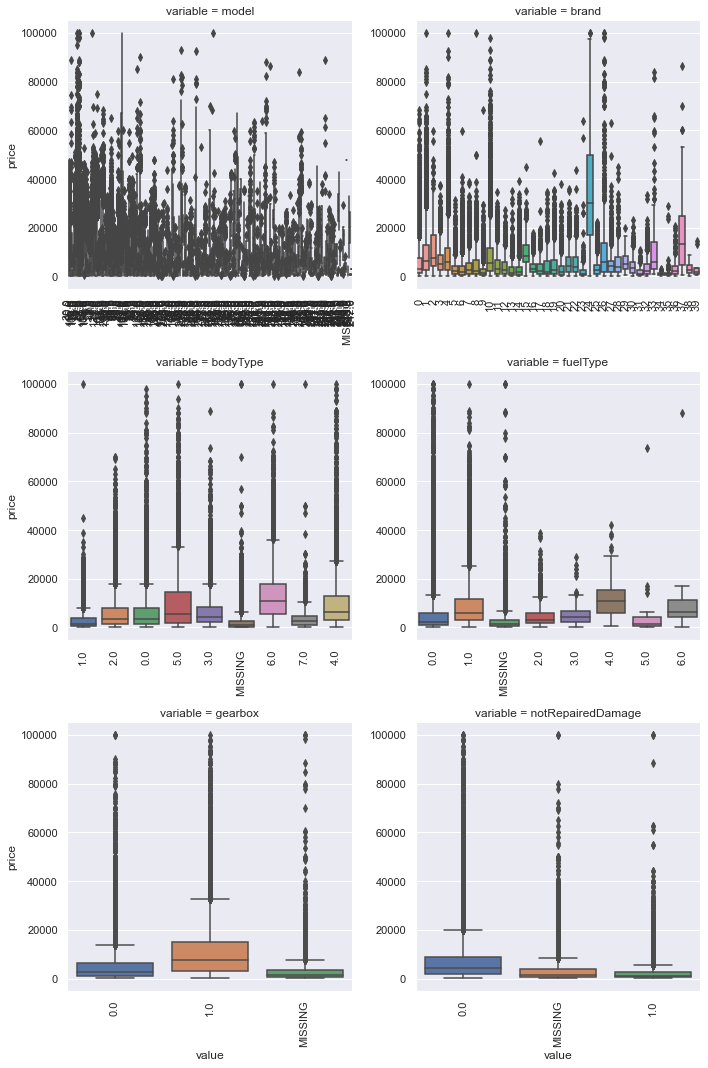

In [71]:
## 2）类别特征箱形图可视化
# 因为name 和regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features=['model',
                     'brand',
                     'bodyType',
                     'fuelType',
                     'gearbox',
                     'notRepairedDamage']

for c in categorical_features:
    Train_data[c]=Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c]=Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c]=Train_data[c].fillna('MISSING')

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f=pd.melt(Train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,'value','price')

In [72]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

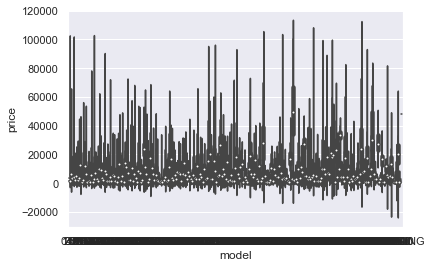

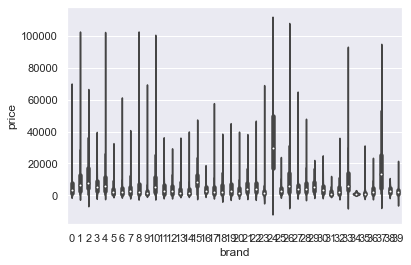

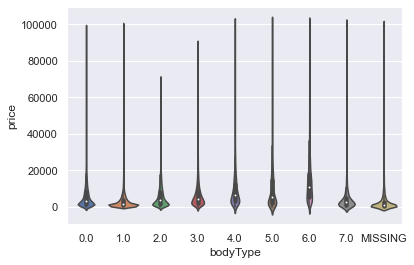

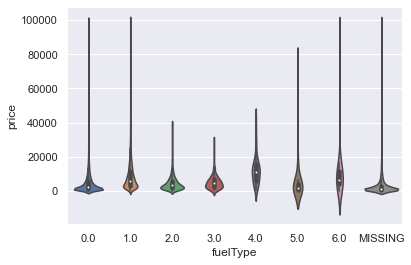

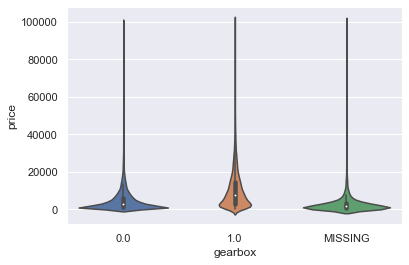

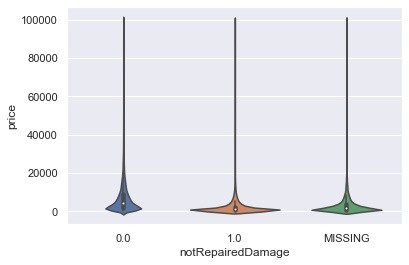

In [73]:
## 3）类别特征的小提琴图可视化
catg_list=categorical_features
target='price'
for catg in catg_list:
    sns.violinplot(x=catg,y=target,data=Train_data)
    plt.show()

In [74]:
categorical_features

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

In [76]:
## 4）类别特征的柱形图可视化
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f=pd.melt(Train_data,id_vars='price',value_vars=categorical_features)
f

,price,variable,value
0,1850,model,30
1,3600,model,40
2,6222,model,115
3,2400,model,109
4,5200,model,110
...,...,...,...
899995,5900,notRepairedDamage,0.0
899996,9500,notRepairedDamage,0.0
899997,7500,notRepairedDamage,0.0
899998,4999,notRepairedDamage,0.0


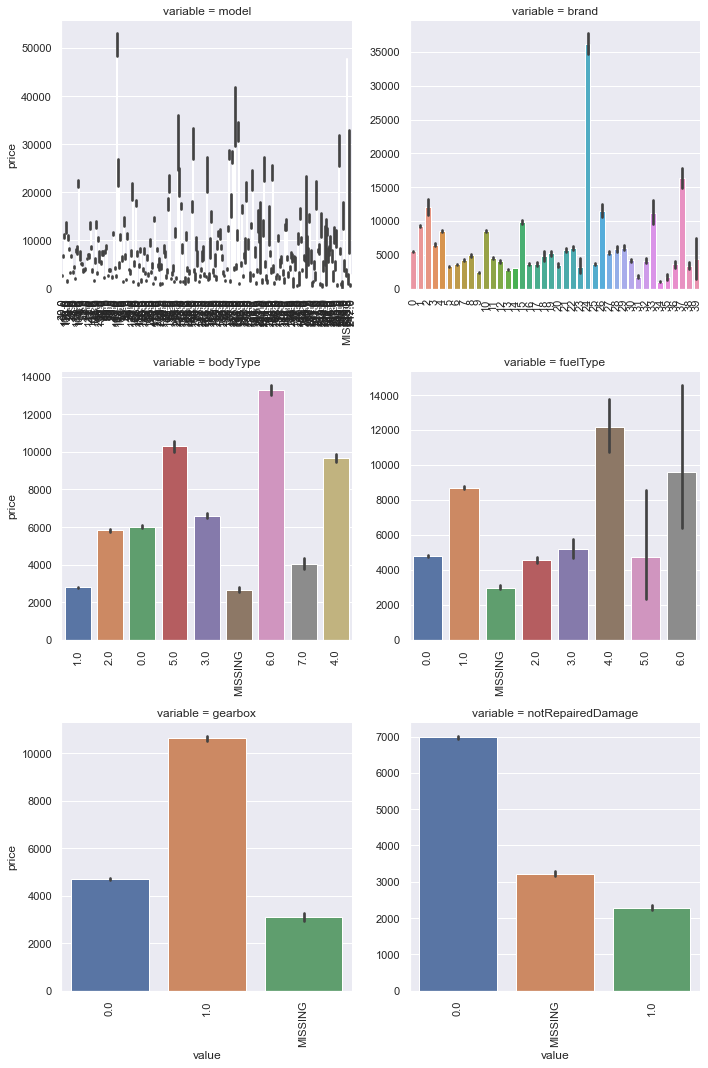

In [79]:
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(bar_plot,'value','price')
#显示每个variable类别里对不同value都绘制price的条形图，绘制的是它的平均值

### 9）用pandas_profiling生成数据报告
- 最终打开html文件即可

In [92]:
import pandas_profiling

In [93]:
pfr=pandas_profiling.ProfileReport(Train_data)
pfr.to_file('./example.html')

## 总结

- 1.对于数据的初步分析，describe(),info()可以从：样本数量，训练集数量，是否有时间特征，是否有时序问题，特征所表示的含义（非匿名特征），特征类型（字符类型，int,float,time）,特征的缺失情况
- 2.分析记录某些特征值缺失占比30%以上样本的缺失处理，分析特征应该是填充（填充方式），还是舍去，还是先做样本分类不同的特征模型去预测
- 3.对于异常值做专门的分析，分析特征异常的label是否为异常值，异常值是否应该剔除，还是用正常值填充，是记录异常还是机器本身异常
- 4.对于label做专门的分析，分析标签的分布情况
- 5.进步分析：
    - 可以用特征作图，用箱形图分析特征值的偏离情况
    - 特征和label联合作图，用特征和特征联合作图，分析关联性，热力图